In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('data/data_mlr.xlsx',sheet_name="data")

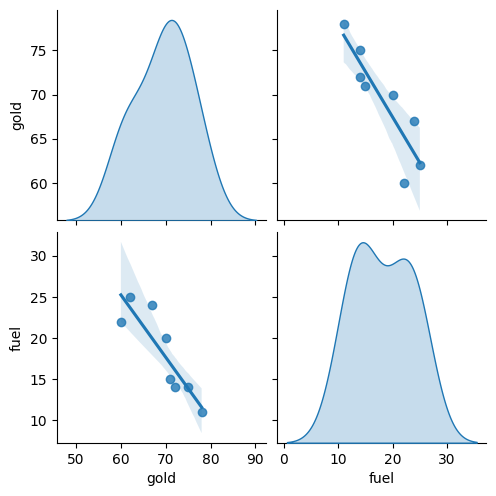

In [3]:
sns.pairplot(df[['gold','fuel']], 
             diag_kind='kde', kind='reg')
plt.show()

In [4]:
# Tập dữ liệu Input (đặc trưng) và Output (mục tiêu)
X = df[['gold','fuel']].values # explanatory = feature
y = df[['food']].values # reponse = target

# Đảm bảo dữ liệu là kiểu số thực
X = X.astype(float)
y = y.astype(float)

In [5]:
# Cross Validation
# Chia tách ra training (huấn luyện) và testing (kiểm thử)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4, 
                                                    random_state=16)

In [6]:
X_train

array([[72., 14.],
       [78., 11.],
       [75., 14.],
       [62., 25.]])

In [7]:
y_train

array([[200.],
       [215.],
       [212.],
       [155.]])

In [8]:
# Xây dựng mô hình hồi quy tuyến tính đa biến
from sklearn import linear_model

# Khai báo mô hình MLR
model = linear_model.LinearRegression()

# Huấn luyện mô hình
model.fit(X_train, y_train)

LinearRegression()

In [9]:
print(model.intercept_)

[30.74820144]


In [10]:
print(model.coef_)

[[ 2.63309353 -1.51079137]]


In [11]:
y_test_pred = model.predict(X_test)
y_test_pred


array([[170.90647482],
       [195.03597122],
       [155.49640288],
       [184.84892086]])

In [12]:
X_test

array([[67., 24.],
       [71., 15.],
       [60., 22.],
       [70., 20.]])

In [13]:
y_test

array([[159.],
       [192.],
       [140.],
       [179.]])

In [14]:
import numpy as np
from sklearn import metrics

# Tính giá trị dự báo ProfitRate dựa trên dữ liệu TimeAds của tập test
y_test_pred = model.predict(X_test)

print('Score or R-Squared:', model.score(X_test, y_test))

print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_test_pred))  
print('Root Mean Squared Error:', 
      np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))
print('Mean Absolute Percentage Error:', 
      metrics.mean_absolute_percentage_error(y_test, y_test_pred))

Score or R-Squared: 0.727527455911011
Mean Absolute Error: 9.071942446043153
Root Mean Squared Error: 10.311760777419536
Mean Absolute Percentage Error: 0.05851499177188531


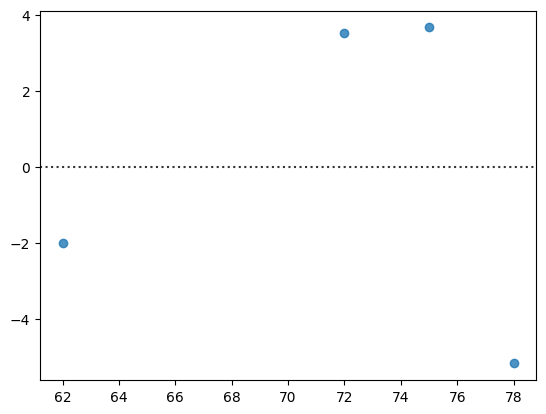

In [15]:
# ta phải biểu diễn tất cả các đặc trưng so với target
sns.residplot(x=X_train[:,0], y=y_train)
plt.show()

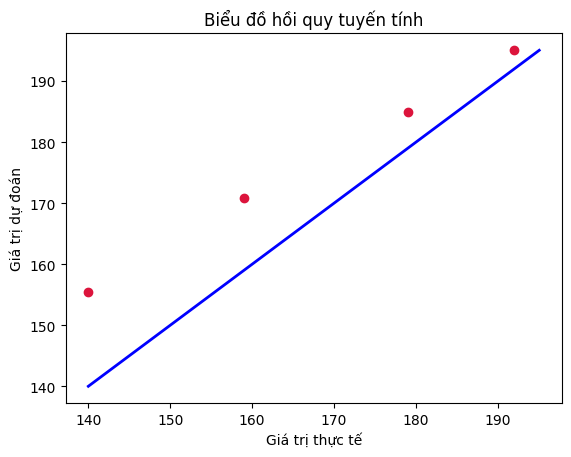

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# Dự đoán kết quả trên tập kiểm thử
y_test_pred = model.predict(X_test)

# Vẽ biểu đồ scatter với dữ liệu thực tế và giá trị dự đoán
plt.scatter(y_test, y_test_pred, c='crimson')

# Vẽ đường hồi quy tuyến tính (y=x)
p1 = max(max(y_test), max(y_test_pred))
p2 = min(min(y_test), min(y_test_pred))
plt.plot([p1, p2], [p1, p2], 'b-', linewidth=2)

# Cài đặt nhãn và tiêu đề cho biểu đồ
plt.xlabel('Giá trị thực tế')
plt.ylabel('Giá trị dự đoán')
plt.title('Biểu đồ hồi quy tuyến tính')
plt.show()


In [17]:
import pickle

# Lưu mô hình đã huấn luyện vào file
pickle.dump(model, open('data/multi_model_linear_regression.sav', 'wb'))


In [18]:
import pickle

# Load model từ storage
loaded_model = pickle.load(open('model/mutli_model_linear_regression.sav', 'rb'))

# Nhập giá trị cho gold và fuel từ người dùng
vGold = float(input('Nhập giá trị gold (giá vàng): '))
vFuel = float(input('Nhập giá trị fuel (giá nhiên liệu): '))

# Tạo mảng chứa giá trị gold và fuel để dự đoán
predicted_FoodPrice = loaded_model.predict([[vGold, vFuel]])

# Hiển thị kết quả dự đoán
print(f'Dự báo giá thực phẩm là: {predicted_FoodPrice[0]}')


Dự báo giá thực phẩm là: [41.97122302]
